In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



In [2]:

# Load the dataset
df = pd.read_json("./data/processed/te/train.json", orient="records", lines=True)
print(df.head())  # Check structure

    docid                                             tokens  \
0  file01  [జమ్మూవిల్లే, భారీ వర్షపాతం ద్వారా, చాలా, స్థా...   
1  file02  [భూమధ్యరేఖ, బస్సు, ఓవర్‌షాడో, ప్రమాదం:, 11 మంద...   
2  file03  [ఇరాన్లో, శక్తి, కుడి, భూకంపం:, 2, పాత్ర, త్యా...   
3  file04  [10, చనిపోతారు, ఇన్, ఈజిప్ట్, చర్చి, దాడి., పద...   
4  file05  [50, చనిపోయిన, ఇన్, ఆత్మహత్య, బాంబు, దాడి, వద్...   

                                                tags  \
0  [B-PLACE-ARG, B-REASON-ARG, O, O, B-NATURAL_EV...   
1  [B-PLACE-ARG, B-MAN_MADE_EVENT.TRANSPORT_HAZAR...   
2  [B-PLACE-ARG, B-INTENSITY-ARG, I-INTENSITY-ARG...   
3  [B-CASUALTIES-ARG, I-CASUALTIES-ARG, O, B-PLAC...   
4  [B-CASUALTIES-ARG, I-CASUALTIES-ARG, O, B-MAN_...   

                                    labels  
0          {'NATURAL_EVENT.LAND_SLIDE': 5}  
1  {'MAN_MADE_EVENT.TRANSPORT_HAZARDS': 8}  
2          {'NATURAL_EVENT.EARTHQUAKE': 7}  
3   {'MAN_MADE_EVENT.TERRORIST_ATTACK': 7}  
4     {'MAN_MADE_EVENT.SUICIDE_ATTACK': 7}  


In [3]:
manmade_docids = []
natural_docids = []

for idx, row in df.iterrows():
    labels = row['labels']
    if isinstance(labels, dict):  # making sure it's valid
        if any(label.startswith('MAN_MADE_EVENT') for label in labels.keys()):
            manmade_docids.append(row['docid'])
        elif any(label.startswith('NATURAL_EVENT') for label in labels.keys()):
            natural_docids.append(row['docid'])

print(f"Total manmade files: {len(manmade_docids)}")
print(f"Total natural files: {len(natural_docids)}")

# Optional: Print or save the docid lists
print("\nManmade files list:")
print(manmade_docids)

print("\nNatural files list:")
print(natural_docids)


Total manmade files: 1100
Total natural files: 1100

Manmade files list:
['file02', 'file04', 'file05', 'file06', 'file08', 'file09', 'file10', 'file100', 'file1001', 'file1002', 'file1003', 'file1004', 'file1005', 'file1006', 'file1008', 'file1009', 'file1011', 'file1012', 'file1015', 'file1016', 'file1018', 'file1019', 'file102', 'file1020', 'file1021', 'file1024', 'file1025', 'file103', 'file1030', 'file1033', 'file1034', 'file1035', 'file1036', 'file1039', 'file104', 'file1043', 'file1044', 'file1046', 'file1047', 'file1049', 'file105', 'file1050', 'file1056', 'file1057', 'file1059', 'file106', 'file1061', 'file1063', 'file1067', 'file1068', 'file1071', 'file1073', 'file1074', 'file1078', 'file1079', 'file108', 'file1080', 'file1082', 'file1084', 'file1086', 'file1088', 'file109', 'file1090', 'file1091', 'file1093', 'file1095', 'file1098', 'file11', 'file1100', 'file1101', 'file1103', 'file1107', 'file1108', 'file1109', 'file1112', 'file1113', 'file1115', 'file1116', 'file1117', 'f

In [4]:
print(df['labels']) 

0                         {'NATURAL_EVENT.LAND_SLIDE': 5}
1                 {'MAN_MADE_EVENT.TRANSPORT_HAZARDS': 8}
2                         {'NATURAL_EVENT.EARTHQUAKE': 7}
3                  {'MAN_MADE_EVENT.TERRORIST_ATTACK': 7}
4                    {'MAN_MADE_EVENT.SUICIDE_ATTACK': 7}
                              ...                        
2195                          {'MAN_MADE_EVENT.CRIME': 2}
2196                          {'MAN_MADE_EVENT.CRIME': 4}
2197                 {'MAN_MADE_EVENT.SUICIDE_ATTACK': 8}
2198                     {'NATURAL_EVENT.HAIL_STORMS': 4}
2199    {'NATURAL_EVENT.TORNADO': 3, 'NATURAL_EVENT.ST...
Name: labels, Length: 2200, dtype: object


In [5]:
from collections import Counter

# Initialize counters
manmade_count = 0
natural_count = 0

# Loop through each row's labels
for labels_dict in df['labels']:
    for label, count in labels_dict.items():
        if label.startswith('MAN_MADE_EVENT'):
            manmade_count += count
        elif label.startswith('NATURAL_EVENT'):
            natural_count += count

print(f"🛠️ Total MANMADE Events: {manmade_count}")
print(f"🌱 Total NATURAL Events: {natural_count}")


🛠️ Total MANMADE Events: 5620
🌱 Total NATURAL Events: 5799


In [6]:
manmade_files = 0
natural_files = 0
missing_files = 0

for each_row in df['labels']:
    if isinstance(each_row, dict):  # Ensure it's a dictionary
        labels = each_row.keys()  # keys are event names like 'MAN_MADE_EVENT.CRIME'
        if any(label.startswith('MAN_MADE_EVENT') for label in labels):
            manmade_files += 1
        elif any(label.startswith('NATURAL_EVENT') for label in labels):
            natural_files += 1
    else:
        missing_files += 1  # This will count rows that don't have valid labels

print(f"Total files: {len(df)}")
print(f"Manmade files: {manmade_files}")
print(f"Natural files: {natural_files}")
print(f"Missing files: {missing_files}")


Total files: 2200
Manmade files: 1100
Natural files: 1100
Missing files: 0


In [7]:
from sklearn.model_selection import train_test_split

# Convert label dicts to flat strings
df["main_label"] = df["labels"].apply(lambda x: list(x.keys())[0])

# Count label frequencies
label_counts = df["main_label"].value_counts()

# Keep only labels that appear at least 2 times
df = df[df["main_label"].isin(label_counts[label_counts >= 2].index)]

# Now split safely with stratification
df_temp, df_test = train_test_split(
    df,
    test_size=0.15,
    stratify=df["main_label"],
    random_state=42
)

df_train, df_valid = train_test_split(
    df_temp,
    test_size=0.15,
    stratify=df_temp["main_label"],
    random_state=42
)

print("Training Data Shape:", df_train.shape)
print("Validation Data Shape:", df_valid.shape)
print("Test Data Shape:", df_test.shape)


Training Data Shape: (1588, 5)
Validation Data Shape: (281, 5)
Test Data Shape: (330, 5)


In [8]:
# Extract features (tokens) and labels for train, valid, and test
X_train = df_train["tokens"]
X_valid = df_valid["tokens"]
X_test = df_test["tokens"]

# Extract class label from the dictionary keys (e.g., {'MAN_MADE_EVENT_FIRE': 1.0} → 'MAN_MADE_EVENT')
y_train = df_train["labels"].apply(lambda x: list(x.keys())[0])
y_valid = df_valid["labels"].apply(lambda x: list(x.keys())[0])
y_test = df_test["labels"].apply(lambda x: list(x.keys())[0])

print("Sample Labels in Training Set:", y_train.unique())  # Check class distribution


Sample Labels in Training Set: ['MAN_MADE_EVENT.VEHICULAR_COLLISION' 'NATURAL_EVENT.LAND_SLIDE'
 'NATURAL_EVENT.AVALANCHES' 'NATURAL_EVENT.CYCLONE'
 'MAN_MADE_EVENT.ACCIDENTS' 'MAN_MADE_EVENT.CRIME'
 'NATURAL_EVENT.EARTHQUAKE' 'MAN_MADE_EVENT.AVIATION_HAZARD'
 'MAN_MADE_EVENT.SURGICAL_STRIKES' 'MAN_MADE_EVENT.TRANSPORT_HAZARDS'
 'MAN_MADE_EVENT.INDUSTRIAL_ACCIDENT' 'NATURAL_EVENT.HAIL_STORMS'
 'MAN_MADE_EVENT.TERRORIST_ATTACK' 'MAN_MADE_EVENT.FIRE'
 'MAN_MADE_EVENT.SUICIDE_ATTACK' 'NATURAL_EVENT.FLOODS'
 'NATURAL_EVENT.STORM' 'NATURAL_EVENT.HEAT_WAVE' 'NATURAL_EVENT.HURRICANE'
 'MAN_MADE_EVENT.SHOOT_OUT' 'NATURAL_EVENT.FOREST_FIRE'
 'NATURAL_EVENT.TSUNAMI' 'MAN_MADE_EVENT.TRAIN_COLLISION'
 'MAN_MADE_EVENT.MISCELLANEOUS' 'NATURAL_EVENT.BLIZZARD'
 'NATURAL_EVENT.COLD_WAVE' 'NATURAL_EVENT.VOLCANO' 'NATURAL_EVENT.TORNADO'
 'MAN_MADE_EVENT.NORMAL_BOMBING' 'NATURAL_EVENT.PANDEMIC'
 'NATURAL_EVENT.EPIDEMIC' 'NATURAL_EVENT.ROCK_FALL' 'MAN_MADE_EVENT.RIOTS'
 'NATURAL_EVENT.DROUGHT' 'MAN_MADE_EV

In [9]:
# Function to map events into two categories
def binary_label(label):
    if str(label).startswith("NATURAL_EVENT"):
        return "NATURAL_EVENT"
    else:
        return "MAN_MADE_EVENT"

# Apply binary conversion
y_train_binary = y_train.apply(binary_label)
y_valid_binary = y_valid.apply(binary_label)
y_test_binary = y_test.apply(binary_label)

# Show unique classes and counts
print("Training Set Binary Distribution:")
print(y_train_binary.value_counts())

print("\nValidation Set Binary Distribution:")
print(y_valid_binary.value_counts())

print("\nTest Set Binary Distribution:")
print(y_test_binary.value_counts())


Training Set Binary Distribution:
NATURAL_EVENT     800
MAN_MADE_EVENT    788
Name: labels, dtype: int64

Validation Set Binary Distribution:
NATURAL_EVENT     142
MAN_MADE_EVENT    139
Name: labels, dtype: int64

Test Set Binary Distribution:
NATURAL_EVENT     168
MAN_MADE_EVENT    162
Name: labels, dtype: int64


In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Convert labels to binary: Man-Made (1) vs Natural (0)
def binary_label(label):
    if str(label).startswith("NATURAL_EVENT"):
        return "NATURAL_EVENT"
    else:
        return "MAN_MADE_EVENT"

y_train_binary = y_train.apply(binary_label)
y_valid_binary = y_valid.apply(binary_label)
y_test_binary = y_test.apply(binary_label)

# Compute class weights for imbalance handling
classes = np.array(["MAN_MADE_EVENT", "NATURAL_EVENT"])
class_weights = dict(zip(
    classes,
    compute_class_weight("balanced", classes=classes, y=y_train_binary)
))

# Pipeline: TF-IDF + Logistic Regression
clf_binary = Pipeline([
    ("tfidf", TfidfVectorizer(
        tokenizer=lambda x: x,  # tokens already preprocessed
        preprocessor=lambda x: x,
        max_features=1000,
        stop_words="english",
        ngram_range=(1, 1),
        min_df=5,
        max_df=0.8,
        sublinear_tf=True,
        norm="l2"
    )),
    ("model", LogisticRegression(
        C=0.01,
        class_weight=class_weights,
        max_iter=500,
        penalty="l2"
    ))
])

# Fit the model on training data
clf_binary.fit(X_train, y_train_binary)

# Training Performance
y_train_pred = clf_binary.predict(X_train)
print("Training Classification Report:")
print(classification_report(y_train_binary, y_train_pred))

# Validation Performance
y_valid_pred = clf_binary.predict(X_valid)
print("\nValidation Classification Report:")
print(classification_report(y_valid_binary, y_valid_pred))

# Final Test Evaluation
y_test_pred = clf_binary.predict(X_test)
print("\nFinal Test Classification Report:")
print(classification_report(y_test_binary, y_test_pred))


c:\Users\kotav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\kotav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Training Classification Report:
                precision    recall  f1-score   support

MAN_MADE_EVENT       0.88      0.93      0.91       788
 NATURAL_EVENT       0.93      0.88      0.90       800

      accuracy                           0.91      1588
     macro avg       0.91      0.91      0.91      1588
  weighted avg       0.91      0.91      0.91      1588


Validation Classification Report:
                precision    recall  f1-score   support

MAN_MADE_EVENT       0.87      0.88      0.87       139
 NATURAL_EVENT       0.88      0.87      0.87       142

      accuracy                           0.87       281
     macro avg       0.87      0.87      0.87       281
  weighted avg       0.87      0.87      0.87       281


Final Test Classification Report:
                precision    recall  f1-score   support

MAN_MADE_EVENT       0.87      0.91      0.89       162
 NATURAL_EVENT       0.91      0.87      0.89       168

      accuracy                           0.89     

In [11]:
# Function to predict binary event type
def predict_event_binary(text, model=clf_binary):
    tokens = text.split()  # Tokenizing the input sentence
    prediction = model.predict([tokens])[0]  # Predict using the trained model
    return prediction

# Example manual test cases
sample_texts = [
    "బాంబు పేలుడు ఘటనలో ముగ్గురు మృతి",  # Should be MAN_MADE_EVENT
    "లారీ బస్సును ఢీకొట్టింది, ఇద్దరు గాయపడ్డారు",  # Should be MAN_MADE_EVENT
    "భూకంపం సంభవించింది, భవనాలు కూలిపోయాయి",  # Should be NATURAL_EVENT
    "తుఫాను తీరాన్ని తాకింది, ప్రజలు సురక్షిత ప్రాంతాలకు తరలింపు"  # Should be NATURAL_EVENT
]

# Predict and display results
for text in sample_texts:
    print(f"Text: {text}")
    print(f"Predicted Event Type: {predict_event_binary(text)}")
    print("-" * 50)


Text: బాంబు పేలుడు ఘటనలో ముగ్గురు మృతి
Predicted Event Type: MAN_MADE_EVENT
--------------------------------------------------
Text: లారీ బస్సును ఢీకొట్టింది, ఇద్దరు గాయపడ్డారు
Predicted Event Type: MAN_MADE_EVENT
--------------------------------------------------
Text: భూకంపం సంభవించింది, భవనాలు కూలిపోయాయి
Predicted Event Type: NATURAL_EVENT
--------------------------------------------------
Text: తుఫాను తీరాన్ని తాకింది, ప్రజలు సురక్షిత ప్రాంతాలకు తరలింపు
Predicted Event Type: NATURAL_EVENT
--------------------------------------------------


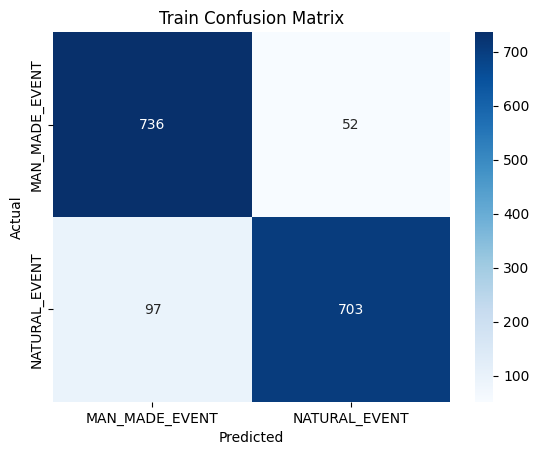

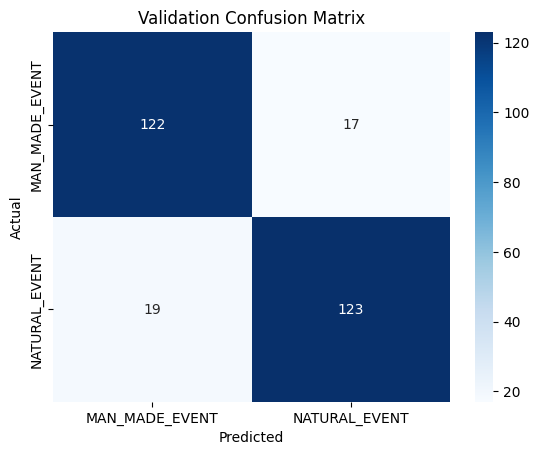

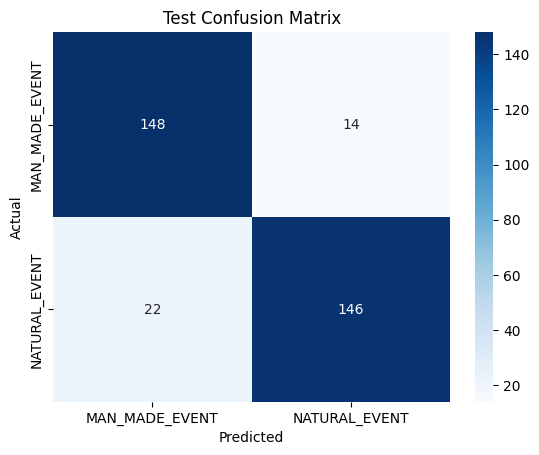

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["MAN_MADE_EVENT", "NATURAL_EVENT"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["MAN_MADE_EVENT", "NATURAL_EVENT"],
                yticklabels=["MAN_MADE_EVENT", "NATURAL_EVENT"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot for train
plot_confusion_matrix(y_train_binary, y_train_pred, "Train Confusion Matrix")

# Plot for validation
plot_confusion_matrix(y_valid_binary, y_valid_pred, "Validation Confusion Matrix")

# Plot for test
plot_confusion_matrix(y_test_binary, y_test_pred, "Test Confusion Matrix")
